### Задание 1
Вопросы по заданию  
Преподаватель: Олег Булыгин  
Домашнее задание http://prntscr.com/ujddtw  

1. Возьмите датасет Mortality and Water Hardness  
www.kaggle.com...r-hardness  

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
water = pd.read_csv('C:/Netology/Сorrelation_regression/water.csv')
water.sample(5)

,Unnamed: 0,location,town,mortality,hardness
5,6,North,Bolton,1558,10
59,60,South,Wolverhampton,1485,81
52,53,North,Stoke,1640,57
10,11,South,Bristol,1392,73
13,14,South,Coventry,1307,78


In [7]:
water.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


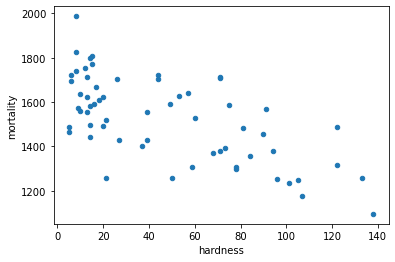

In [8]:
water.plot(kind='scatter', x='hardness', y='mortality')
water[['mortality', 'hardness']].corr()

In [9]:
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [10]:
water[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = water[['hardness']] # Многомерный потому что может быть несколько значений
y = water['mortality'] # Всегда одномерный 

In [12]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=30, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[-3.43672606]
1692.4923372633818


In [15]:
y_pred = model.predict(X_test)
print(y_pred)
print('')
print(f'Коэффициент детерминации: {model.score(X_test, y_test)} ') # метод возвращает значение коэффициента детерминации

[1331.63610075 1658.12507664 1644.37817239 1541.27639053 1424.42770442
 1623.75781602 1235.40777101 1434.73788261 1620.32108996 1671.87198089
 1489.7254996  1414.11752624 1558.46002084 1644.37817239 1448.48478686
 1558.46002084 1658.12507664 1640.94144633 1345.383005   1630.63126815
 1524.09276022 1620.32108996 1458.79496504 1496.59895173 1218.2241407
 1510.34585598 1623.75781602 1273.21175769 1565.33347297 1403.80734805]

Коэффициент детерминации: 0.3852486026500588 


In [16]:
#Посмотрим результаты прогнозов в таблице 
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df['diff'] = round(res_df['y_pred'] - res_df['y_test'],0)
res_df['%'] = round((res_df['diff'] / res_df['y_test'])*100,0)

res_df.sample(5)

,hardness,y_pred,y_test,diff,%
59,81,1414.117526,1485,-71.0,-5.0
6,15,1640.941446,1807,-166.0,-9.0
49,75,1434.737883,1587,-152.0,-10.0
44,49,1524.092760,1591,-67.0,-4.0
46,14,1644.378172,1495,149.0,10.0


In [30]:
#вы не построили графики остатков :) Точнее они строятся немного иначе (по оси X берется разница test и prediction, а по оси Y - prediction), посмотрите вот здесь примеры:
# Остатки
residuals = y_test - y_pred

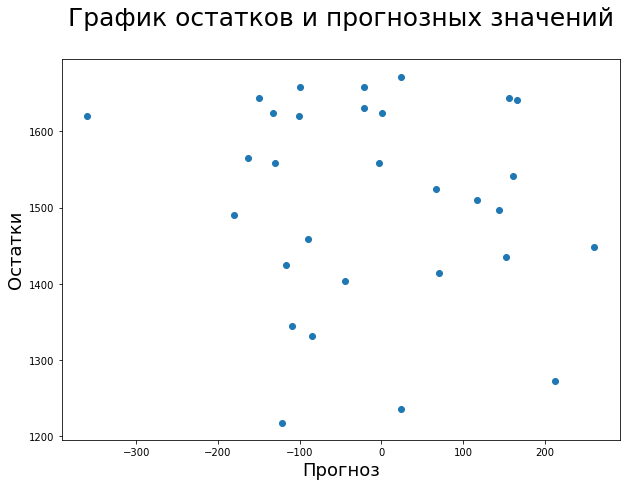

In [31]:
plt.figure(figsize=(10,7))
plt.title("График остатков и прогнозных значений\n",fontsize=25)
plt.xlabel("Прогноз",fontsize=18)
plt.ylabel("Остатки", fontsize=18)
plt.scatter(x=residuals,y=y_pred)

Остатки распределение 

C:\Users\vagin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Гистограмма остатков для проверки распределения'}, xlabel='Остатки', ylabel='Плотность'>

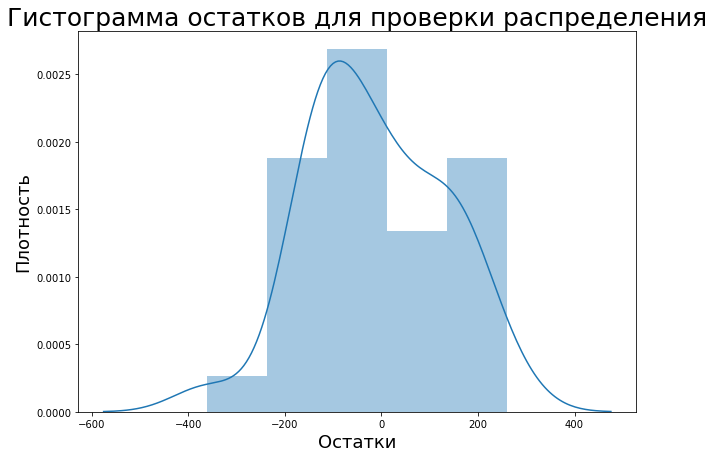

In [32]:
plt.figure(figsize=(10,7))
plt.title('Гистограмма остатков для проверки распределения',fontsize=25)
plt.xlabel('Остатки',fontsize=18)
plt.ylabel('Плотность', fontsize=18)
sns.distplot([residuals])

### Ответ  
По полученным данный видим, что между переменными существует обратная корреляция -0,63. Чем выше жесткость воды тем смертность ниже.  
После построения модели линейной ригрессии очевидно, что связи нет . Коэффициент детерминации 0,38    

### Задание 2.  
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности  

### Отбор по Северным городам  

In [161]:
north_town = water['location'] == 'North'
water_filtred_north = water.loc[north_town]
water_filtred_north.head(3)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


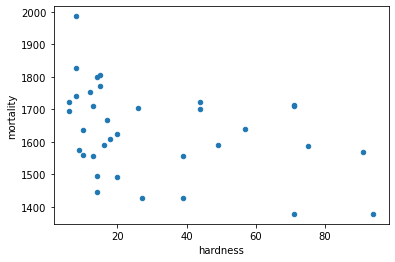

In [162]:
water_filtred_north.plot(kind='scatter', x='hardness', y='mortality')
water_filtred_north[['mortality', 'hardness']].corr()

In [163]:
print(water_filtred_north[['mortality', 'hardness']].corr(method='spearman'))
print()
print(water_filtred_north[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000

           mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000


In [181]:
X_north = water_filtred_north[['hardness']] 
y_north = water_filtred_north['mortality']

In [182]:
X_north_train, X_north_test, y_north_train,  y_north_test = train_test_split(X_north, y_north, test_size=30, random_state=42)

In [183]:
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train) 

LinearRegression()

In [167]:
print(model_north.coef_)
print(model_north.intercept_)

[1.19585277]
1422.4755627661732


In [168]:
y_north_pred = model_north.predict(X_north_test)
print(y_north_pred)
print('')
print(f'Коэффициент детерминации: {model_north.score(X_north_test, y_north_test)} ') # метод возвращает значение коэффициента детерминации

[1432.04238491 1433.23823768 1439.21750152 1429.65067938 1441.60920706
 1507.38110931 1475.09308457 1432.04238491 1469.11382073 1440.41335429
 1469.11382073 1446.39261813 1442.80505983 1440.41335429 1432.04238491
 1439.21750152 1434.43409045 1534.88572298 1439.21750152 1444.00091259
 1507.38110931 1434.43409045 1438.02164875 1438.02164875 1490.63917055
 1475.09308457 1429.65067938 1453.56773474 1481.07234841 1436.82579598]

Коэффициент детерминации: -2.7477821212518614 


In [199]:
#Посмотрим результаты прогнозов в таблице 
res_df = X_north_test.copy()

res_df_north['y_north_pred'] = y_north_pred
res_df_north['y_north_test'] = y_north_test
res_df_north['diff_north'] = round(res_df_north['y_north_pred'] - res_df_north['y_north_test'],0)
res_df_north['%'] = round((res_df_north['diff_north'] / res_df_north['y_north_test'])*100,0)

res_df_north.sample(5)

,hardness,y_north_pred,y_north_test,diff_north,%
1,17,1442.805060,1668,-225.0,-13.0
28,15,1440.413354,1772,-332.0,-19.0
29,8,1432.042385,1828,-396.0,-22.0
31,44,1475.093085,1702,-227.0,-13.0
26,16,1441.609207,1591,-149.0,-9.0


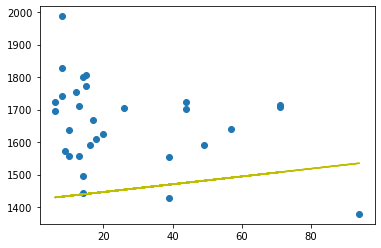

In [209]:
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='y')

### Отбор по Южным городам

In [172]:
south_town = water['location'] == 'South'
water_filtred_south = water.loc[south_town]
water_filtred_south.head(3)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


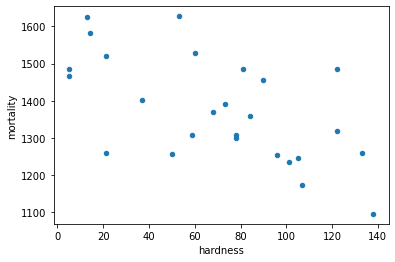

In [173]:
water_filtred_south.plot(kind='scatter', x='hardness', y='mortality')
water_filtred_south[['mortality', 'hardness']].corr()

In [174]:
print(water_filtred_south[['mortality', 'hardness']].corr(method='spearman'))
print()
print(water_filtred_south[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000

           mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000


In [177]:
X_south = water_filtred_south[['hardness']] 
y_south = water_filtred_south['mortality'] 

In [189]:
X_south_train, X_south_test, y_south_train,  y_south_test = train_test_split(X_south, y_south, test_size=0.3, random_state=42)

In [190]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [191]:
print(model_south.coef_)
print(model_south.intercept_)

[-3.51342921]
1640.2204603423374


In [192]:
y_south_pred = model_south.predict(X_south_test)
print(y_south_pred)
print('')
print(f'Коэффициент детерминации: {model_south.score(X_south_test, y_south_test)} ') # метод возвращает значение коэффициента детерминации

[1211.58209643 1622.65331428 1271.31039304 1211.58209643 1510.22357948
 1566.43844688 1432.92813681 1622.65331428]

Коэффициент детерминации: -2.5519223012352077 


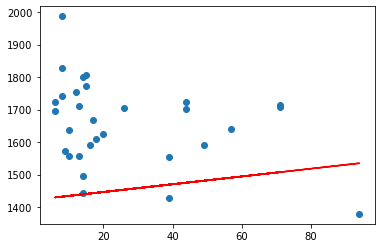

In [211]:
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_north_pred, c='r')

### Ответ Задача 2.  
При разделении данных на группы , ситуация ухудшилась . Коэффициент детерминации отрицательный . Это также  подтверждает что зависимости смертности от жесткости воды нет .   